# K-Means Clustering

K-Means clustering intends to partition n objects into k clusters in which each object belongs to the cluster with the nearest mean. This method produces exactly k different clusters of greatest possible distinction. The best number of clusters k leading to the greatest separation (distance) is not known as a priori and must be computed from the data. The objective of K-Means clustering is to minimize total intra-cluster variance, or, the squared error function: 

<img src='../../img/Clustering_kmeans_c.png' height="600" width="800">

### Algorithm

1. Clusters the data into k groups where k  is predefined.
2. Select k points at random as cluster centers.
3. Assign objects to their closest cluster center according to the Euclidean distance function.
4. Calculate the centroid or mean of all objects in each cluster.
5. Repeat steps 2, 3 and 4 until the same points are assigned to each cluster in consecutive rounds.

<img src='../../img/Clustering_kmeans.png'>

### Example:

Suppose we want to group the visitors to a website using just their age (one-dimensional space) as follows:

n = 19

15,15,16,19,19,20,20,21,22,28,35,40,41,42,43,44,60,61,65


Initial clusters (random centroid or average):

c1 = 16

c2 = 22



<img src='../../img/kmeans_distance.png'>

<img src='../../img/kmeans_t1.PNG'>

<img src='../../img/kmeans_t2.PNG'>

<img src='../../img/kmeans_t3.PNG'>

<img src='../../img/kmeans_t4.PNG'>

No change between iterations 3 and 4 has been noted. By using clustering, 2 groups have been identified 15-28 and 35-65. The initial choice of centroids can affect the output clusters, so the algorithm is often run multiple times with different starting conditions in order to get a fair view of what the clusters should be.

<img src='../../img/cluster.gif' height="400" width="600">

K-Means is relatively an efficient method. However, we need to specify the number of clusters, in advance and the final results are sensitive to initialization and often terminates at a local optimum. Unfortunately there is no global theoretical method to find the optimal number of clusters. A practical approach is to compare the outcomes of multiple runs with different k and choose the best one based on a predefined criterion or apply the so called ***"elbow method"*** heuristic shown below. In general, a large k probably decreases the error but increases the risk of overfitting.

### Code Dictionary
code | description
-----|------------
`.KMeans` | K-Means clustering.
`KMeans.inertia_` | Sum of squared distances of samples to their closest cluster center.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
X = dataset.iloc[:, [3, 4]].values

In [9]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [10]:
X = dataset[['Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [6]:
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=2)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'gender': dataset['Genre']})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['gender'])

In [7]:
ct

gender,Female,Male
labels,,
0,58,52
1,54,36


In [9]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'spend': np.where(dataset['Spending Score (1-100)']>=50, 'High spender', 'Low spender')})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['spend'])

In [10]:
ct

gender,High spender,Low spender
labels,,
0,53,57
1,49,41


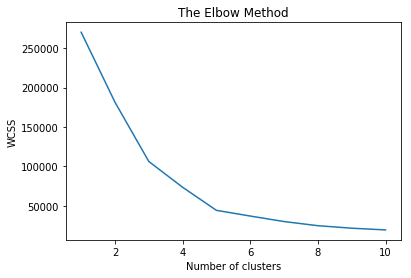

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
spenders = []

for x,y in X:
    if x<40 and y<=40:
        spenders.append('low_income_low_spender')
    elif x>=40 and x<70 and y>=40 and y<=60:
        spenders.append('medium_spender')
    elif x>=70 and y<=40:
        spenders.append('high_income_low_spender')
    elif x<40 and y>=60:
        spenders.append('low_income_high_spender')
    elif x>=69 and y>=60:
        spenders.append('high_income_high_spender')

In [20]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=5)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, kmeans)

In [21]:
# Fit the pipeline to samples
pipeline.fit(X)

# Calculate the cluster labels: labels
labels = pipeline.predict(X)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels' : labels, 'spend' : spenders})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['spend'])

c:\users\seun.adekunle\appdata\local\continuum\anaconda3\envs\myml\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [22]:
ct

spend,high_income_high_spender,high_income_low_spender,low_income_high_spender,low_income_low_spender,medium_spender
labels,,,,,
0,0,0,22,0,0
1,0,3,1,0,77
2,39,0,0,0,0
3,0,0,0,23,0
4,0,35,0,0,0


In [6]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

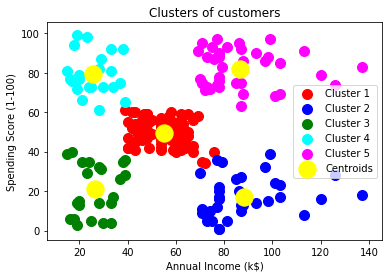

In [7]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### The importance of feature scaling in KMeans Clsutering

In [70]:
example = pd.read_csv('wine.csv')

 Relevant Information:

   -- These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

   -- I think that the initial data set had around 30 variables, but 
      for some reason I only have the 13 dimensional version. 
      I had a list of what the 30 or so variables were, but a.) 
      I lost it, and b.), I would not know which 13 variables
      are included in the set.

   -- The attributes are:
 	1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash  
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline

In [71]:
example.head()

,Variety,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,11)Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [72]:
variety = {1 : 'Babera', 2 : 'Barolo', 3 :'Grignolino'}

In [73]:
from sklearn.cluster import KMeans

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(example)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'gender': example['Variety'].map(variety)})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['gender'])

In [74]:
ct

gender,Babera,Barolo,Grignolino
labels,,,
0,13,20,29
1,46,1,0
2,0,50,19


In [77]:
from sklearn.preprocessing import StandardScaler

# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Create scaler: scaler
scaler = StandardScaler()

X_scaled = scaler.fit_transform(example)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_scaled)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'gender': example['Variety'].map(variety)})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['gender'])

In [78]:
ct

gender,Babera,Barolo,Grignolino
labels,,,
0,0,1,48
1,59,2,0
2,0,68,0


## Exercise

In [8]:
# Take any of the datasets apart from the ones used in the example
# Load the data set

In [ ]:
# Explore the dataset and preprocess it appropriately

In [ ]:
# Create an instance of StandardScaler called scaler.

In [ ]:
# Create an instance of KMeans using the elbow method to select the number of clusters.

In [ ]:
# Create a pipeline called pipeline that chains scaler and kmeans.

## Silhoutte Distance

Silhoutte Distance is used to study the separation between clusters. It can be used to evaluate and select the number of clusters. The formula is given by:

$$ s\left(i\right)=\frac{b\left(i\right)-a\left(i\right)}{\max\left(a\left(i\right),b\left(i\right)\right)} $$

Where, 
1. $a(i)$ = average distance of point $i$ with other members of same cluster. 
2. $b(i)$ = lowest of average distance of point $i$ with member of clusters other than the one it is currently present in. 

The value of $s(i)$ ranges from:

$$-1\le s\left(i\right)\le1$$

The value will be close to 1 when $b(i) >> a(i)$. That is when the nearest neighbor of point $i$ is very far & the members of clusters that $i$ is a part of aren't very far apart. This is the case when the clustering has worked well. 

The opposite case is when the value is close to -1. This happens when $a(i) >> b(i)$. That is when the the average distance of point within cluster is more than that of the neighboring one, then this indicates that the current point would do better if it is assigned to the neighboring one. 

The silhouette of a sample is a mean value of silhouette values from this sample. Therefore, the silhouette distance shows to which extent the distance between the objects of the same class differ from the mean distance between the objects from different clusters. This coefficient takes values in the $[-1, 1]$ range. Values close to -1 correspond to bad clustering results while values closer to 1 correspond to dense, well-defined clusters. Therefore, the higher the silhouette value is, the better the results from clustering.

With the help of silhouette, we can identify the optimal number of clusters $k$ (if we don't know it already from the data) by taking the number of clusters that maximizes the silhouette coefficient.

In [14]:
from sklearn.datasets import make_blobs

# create fake dataset
X, y = make_blobs(100, centers=3)

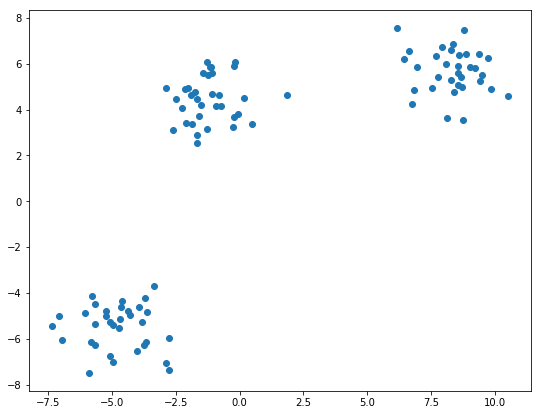

In [15]:
# Visualize data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 7))
plt.scatter([x[0] for x in X], [x[1] for x in X])
plt.show()

In [16]:
# create classifier
import numpy as np
from sklearn.cluster import KMeans

clf = KMeans(n_clusters=3)
y_pred = clf.fit_predict(X)

Text(0, 0.5, 'Dimension 2')

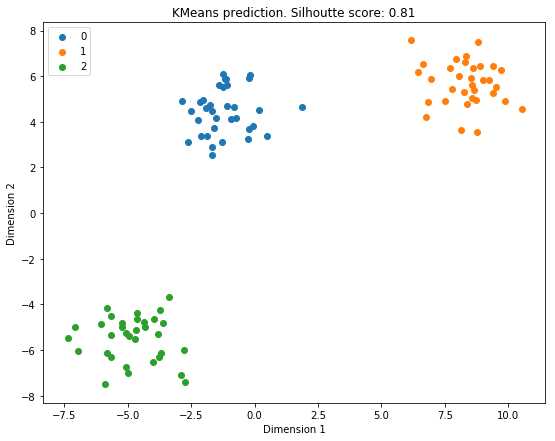

In [17]:
from sklearn.metrics import silhouette_score
fig = plt.figure(figsize=(9, 7))
for label in np.unique(y_pred):
    X_label = X[y==label]
    plt.scatter([x[0] for x in X_label], [x[1] for x in X_label], label=label)
score = silhouette_score(X, y_pred)
plt.legend()
plt.title("KMeans prediction. Silhoutte score: {0:.2f}".format(score))
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")

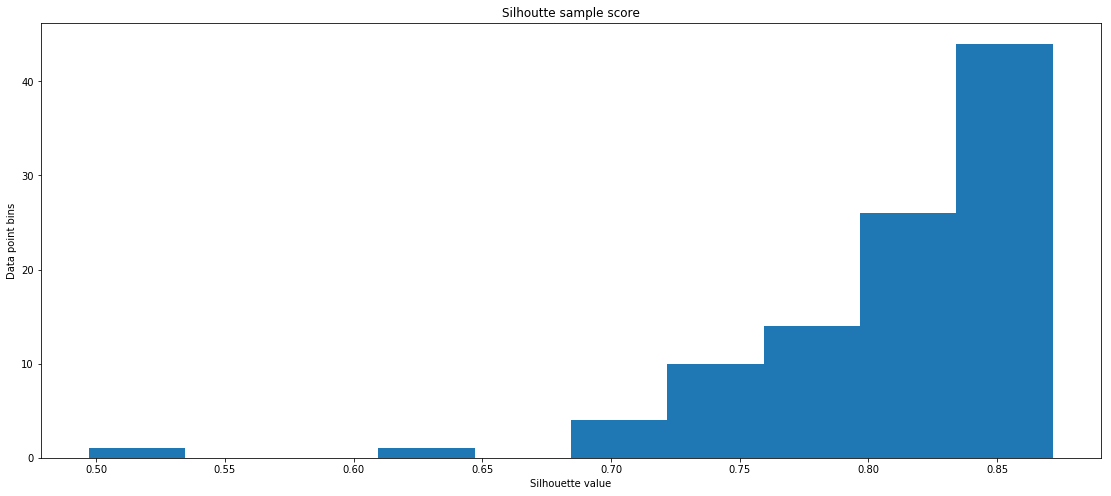

In [18]:
# visualize silhoutte sample scores
from sklearn.metrics import silhouette_samples

fig = plt.figure(figsize=(19, 8))
sample_score = silhouette_samples(X, y_pred)
plt.hist(sample_score)
plt.title("Silhoutte sample score")
plt.xlabel("Silhouette value")
plt.ylabel("Data point bins")
plt.show()

Since most scores are close to 1, we conclude that the model is performing very good. 

## Exercise

In [ ]:
# Make a cluster following the example in the k-means notebook on the pggm dataset using variables
# from Market_cap to LTM_EP inclusive [11 : 18] and provide the silouhette sample plot and comment about it.